MSDS 432 - Mini Programming Assignment 7 <br>
Prepared by Vincent Pun

In this exercise, we will explore Dijkstra's Algorithm in terms of hash maps and computational complexity.  The base code is described in Chapter 7 of Grokking Algorithms (Bhargava 2016).  

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

import pandas as pd

import seaborn as sns
import scipy.stats as stats

import os
import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

**Data**

The image below (RoadTrip_NYC_to_L.A.JPG) shows possible routes to take on a road trip.  The nodes represent city names and vertices are the assumed hours the drive would take.

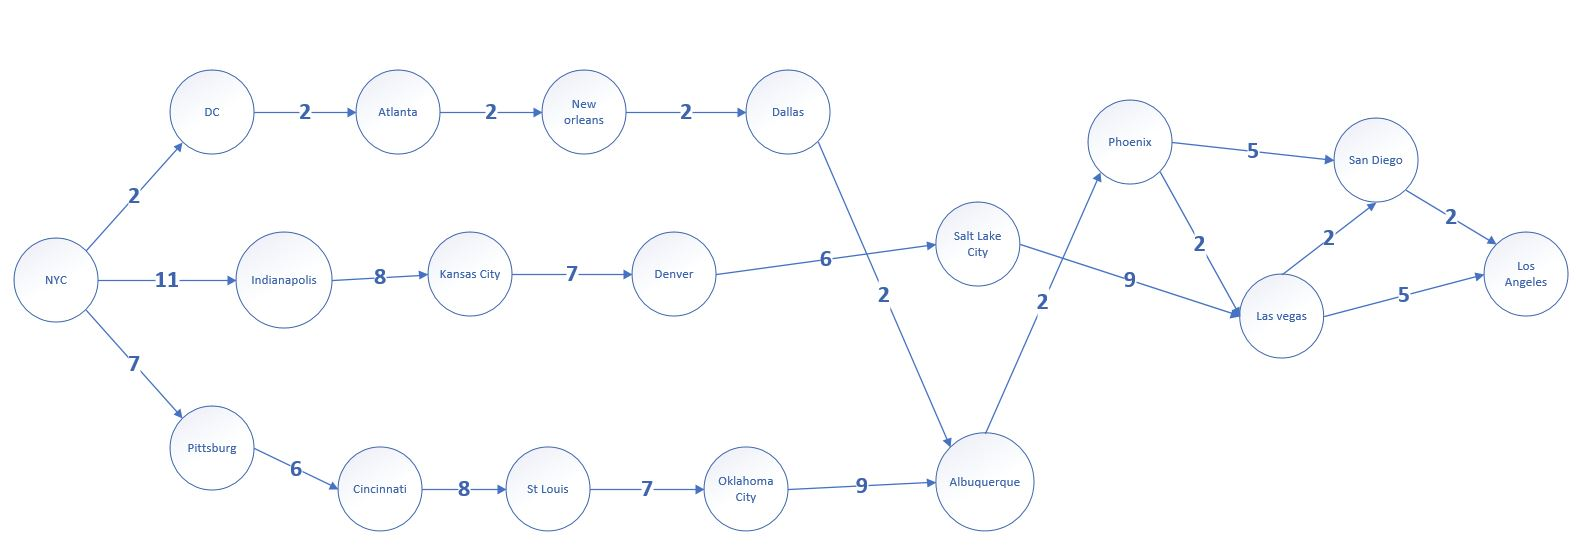

In [2]:
from IPython.display import Image, display
display(Image(filename='/Users/vincentpun/Downloads/RoadTrip_NYC_to_L.A.JPG'))

In [3]:
graph = {}
infinity = float("inf")
costs = {}
parents = {}
processed = []

In [4]:
# the graph
#store neighbor and cost 
graph['NYC'] = {} #add node
graph['NYC']['DC'] = 2 #add neighbor and weight
graph['NYC']['Indianapolis'] = 11 #add neighbor and weight
graph['NYC']['Pittsburg'] = 7 #add neighbor and weight

#add rest of nodes
graph['DC'] = {}
graph['Atlanta'] = {}
graph['New_Orleans'] = {}
graph['Dallas'] = {}
graph['Albuquerque'] = {}
graph['Phoenix'] = {}
graph['Las_Vegas'] = {}
graph['Los_Angeles'] = {}
graph['Indianapolis'] = {}
graph['Kansas_City'] = {}
graph['Denver'] = {}
graph['Pittsburg'] = {}
graph['Cincinnati'] = {}
graph['St_Louis'] = {}
graph['Oklahoma_City'] = {}
graph['Salt_Lake_City'] = {}
graph['San_Diego'] = {}

#add neighbors and weights
graph['DC']['Atlanta'] = 2 #Atlanta is a neighbor, and it is 2 units away
graph['Atlanta']['New_Orleans'] = 2
graph['New_Orleans']['Dallas'] = 2
graph['Dallas']['Albuquerque'] = 2
graph['Albuquerque']['Phoenix'] = 2
graph['Phoenix']['San_Diego'] = 5
graph['San_Diego']['Los_Angeles'] = 2
graph['Phoenix']['Las_Vegas'] = 2
graph['Las_Vegas']['San_Diego'] = 2
graph['Las_Vegas']['Los_Angeles'] = 5

graph['Indianapolis']['Kansas_City'] = 8
graph['Kansas_City']['Denver'] = 7
graph['Denver']['Salt_Lake_City'] = 6
graph['Salt_Lake_City']['Las_Vegas'] = 9

graph['Pittsburg']['Cincinnati'] = 6
graph['Cincinnati']['St_Louis'] = 8
graph['St_Louis']['Oklahoma_City'] = 7
graph['Oklahoma_City']['Albuquerque'] = 9



In [5]:
# the costs table
costs["DC"] = 2
costs["Indianapolis"] = 11
costs["Pittsburg"] = 7

costs["Atlanta"] = infinity
costs["Kansas_City"] = infinity
costs["Cincinnati"] = infinity
costs["New_Orleans"] = infinity
costs["Denver"] = infinity
costs["Oklahoma_City"] = infinity
costs["St_Louis"] = infinity
costs["Dallas"] = infinity
costs["Albuquerque"] = infinity
costs["Salt_Lake_City"] = infinity
costs["Phoenix"] = infinity
costs["Las_Vegas"] = infinity
costs["San_Diego"] = infinity
costs["Los_Angeles"] = infinity


In [6]:
# the parents table
parents["DC"] = "NYC"
parents["Indianapolis"] = "NYC"
parents["Pittsburg"] = "NYC"

parents["Atlanta"] = None
parents["Kansas_City"] = None
parents["Cincinnati"] = None
parents["New_Orleans"] = None
parents["Denver"] = None
parents["Oklahoma_City"] = None
parents["St_Louis"] = None
parents["Dallas"] = None
parents["Albuquerque"] = None
parents["Salt_Lake_City"] = None
parents["Phoenix"] = None
parents["Las_Vegas"] = None
parents["San_Diego"] = None
parents["Los_Angeles"] = None

**Functions**<br>
<br>
1. Breadth-First Algorithm <br>
2. Dijkstra's Algorithm 

In [7]:
#https://pythoninwonderland.wordpress.com/2017/03/18/how-to-implement-breadth-first-search-in-python/

# finds shortest path between 2 nodes of a graph using BFS (no weights)
def bfs_shortest_path(graph, start, goal):
    # keep track of explored nodes
    explored = []
    # keep track of all the paths to be checked
    queue = [[start]]
 
    # return path if start is goal
    if start == goal:
        return "That was easy! Start = goal"
 
    # keeps looping until all possible paths have been checked
    while queue:
        # pop the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]

        if node not in explored:
            neighbours = graph[node]
            # go through all neighbour nodes, construct a new path and
            # push it into the queue
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                # return path if neighbour is goal
                if neighbour == goal:
                    return new_path
 
            # mark node as explored
            explored.append(node)
 
    # in case there's no path between the 2 nodes
    return "a connecting path doesn't exist"

In [8]:
#lowest cost node that hasn't been processed yet

def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    # Go through each node.
    for node in costs:
        cost = costs[node]
        # If it's the lowest cost so far and hasn't been processed yet...
        if cost < lowest_cost and node not in processed:
            # ... set it as the new lowest-cost node.
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

In [26]:
#Dijkstra's Algorithm (Grokking Algorithms Example Code)

# Find the lowest-cost node that you haven't processed yet.
node = find_lowest_cost_node(costs)

# If you've processed all the nodes, this while loop is done.
while node is not None:
    cost = costs[node]
    # Go through all the neighbors of this node.
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        # If it's cheaper to get to this neighbor by going through this node...
        if costs[n] > new_cost:
            # ... update the cost for this node.
            costs[n] = new_cost
            # This node becomes the new parent for this neighbor.
            parents[n] = node
    # Mark the node as processed.
    processed.append(node)
    # Find the next node to process, and loop.
    node = find_lowest_cost_node(costs)

print("Cost from the start to each node:")
print(costs)


Cost from the start to each node:
{'DC': 2, 'Indianapolis': 11, 'Pittsburg': 7, 'Atlanta': 4, 'Kansas_City': 19, 'Cincinnati': 13, 'New_Orleans': 6, 'Denver': 26, 'Oklahoma_City': 28, 'St_Louis': 21, 'Dallas': 8, 'Albuquerque': 10, 'Salt_Lake_City': 32, 'Phoenix': 12, 'Las_Vegas': 14, 'San_Diego': 16, 'Los_Angeles': 18}


**Breadth-First (Application)**

1. First, use the breadth-first algorithm to find the quickest way to get to L.A from NYC and calculate the time that it will take to get to L.A. from NYC using the breadth first algorithm.  (Even though BFS does not use weighted edges, we will indirectly use them to calculate the time of the route).
<br><br>
2. Print the route e.g. NYC -> DC -> ATL etc -> L.A.

In [21]:
result_bfs = bfs_shortest_path(graph, 'NYC', 'Los_Angeles')  

length_bfs = len(result_bfs)

cost_bfs = graph['NYC']['Indianapolis']+graph['Indianapolis']['Kansas_City']+           graph['Kansas_City']['Denver']+graph['Denver']['Salt_Lake_City']+graph['Salt_Lake_City']['Las_Vegas']+graph['Las_Vegas']['Los_Angeles']


In [24]:
print('Route is:',result_bfs)
print('\nlength_bfs = ',length_bfs,'\n\ncost_bfs = ',cost_bfs)

Route is: ['NYC', 'Indianapolis', 'Kansas_City', 'Denver', 'Salt_Lake_City', 'Las_Vegas', 'Los_Angeles']

length_bfs =  7 

cost_bfs =  46


**Dijkstra's Algorithm (Application)**

3. Next, use Dijkstra's algorithm to find the most optimal route to get to L.A from NYC, capture the time that it will take to get to L.A (use the weights in the algorithm assigned to the routes).
<Br>
<br>
4. Print the route e.g. NYC -> DC -> ATL etc -> L.A.

In [68]:
cities = ['Los_Angeles']
route = ['Los_Angeles']

value = []

while value is not 'NYC':
    value = parents.get(cities.pop()) #get parent of city being popped
    cities.append(value) #append parent to cities list
    route.append(value) #append parent city to route list 

route.reverse()

print('Optimal Route:',route)

print('\nThe cost of the most optimal route is',costs['Los_Angeles'])

length_dij = len(route)
cost_dij = costs['Los_Angeles']

Optimal Route: ['NYC', 'DC', 'Atlanta', 'New_Orleans', 'Dallas', 'Albuquerque', 'Phoenix', 'Las_Vegas', 'San_Diego', 'Los_Angeles']

The cost of the most optimal route is 18


**Comparing Algorithms**
<br>
<br>
5. Compare time of Breadth-first algorithm with Dijkstra's algorithm in terms of trip time, stops, computation complexity.  Discuss the reason for differences in methods.
<br>
<Br>
6. Use Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.

In [75]:
#number of stops
length = [length_bfs,length_dij]

#total cost
cost = [cost_bfs,cost_dij]

Algorithm = ["Breadth-First Search","Dijkstra's Algorithm"]

In [76]:
table = pd.DataFrame(list(zip(Algorithm,length,cost)),columns=['Name','Length','Cost'])

table

,Name,Length,Cost
0,Breadth-First Search,7,46
1,Dijkstra's Algorithm,10,18


Text(0.5, 1.0, 'Shortest Path')

Text(0, 0.5, '# of Nodes per Path')

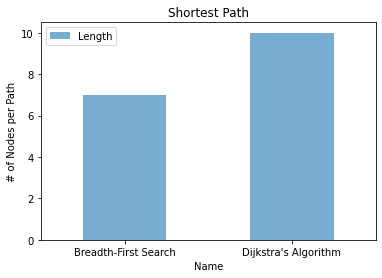

Text(0.5, 1.0, 'Optimal Path (Weighted)')

Text(0, 0.5, 'Cost per Path')

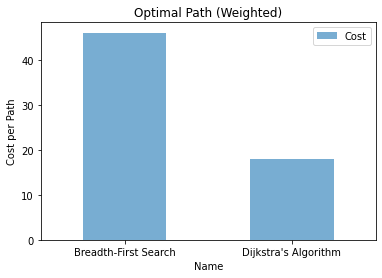

In [79]:
table.plot.bar(x='Name',y='Length',rot=0, alpha=0.6)
plt.title('Shortest Path')
plt.ylabel('# of Nodes per Path')
plt.show()

table.plot.bar(x='Name',y='Cost',rot=0, alpha=0.6)
plt.title('Optimal Path (Weighted)')
plt.ylabel('Cost per Path')
plt.show()

**Executive Summary**
<br>
<br>
Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook.  Explain how the algorithm works and why it is a useful to data engineers.



Big O Notation: <br>

Breadth-first Search = O(V+E) <br>
Dijkstra's Algorithm = O(V+E*log(V))

In this exercise, we apply both the Breadth-First Search and Dijkstra's algorithm to a set of weighted travel data. Our goal is to find the most optimal path from NYC to Los Angeles, and this requires us to consider the cost of travel between cities (nodes/vertices). 

The main difference between Breadth-First Search (BFS) and Dijkstra's algorithm is that BFS is not designed with logic to look at the costs of traveling along edges. It simply searches for the shortest path as it searches for the smallest number of steps that it takes to arrive at each node (city) in the data. While BFS's result only requires visiting seven cities (Dijkstra's Algorithm needs ten), the cost of traveling is more than double compared to the optimal route. 

Dijkstra's algorithm is better suited for this task, as it utilizes weights along the edges, which in this case is the cost of traveling in between cities. The lowest cost route to each city is updated iteratively, and the route is recorded in a hash table titled "parents." In result, Dijkstra's algorithm finds that the most inexpensive route from NYC to Los Angeles will cost 18 units. 

Overall, the choice between BFS and Dijkstra's algorithm is dependent whether the graph (data for nodes and edges) contains weights. BFS should be used if all weights between nodes are identical or nonexistent, as it is a faster algorithm; since Dijkstra's algorithm looks at weights, it needs to update costs and parent hashes when it processes each node. 

